# Business Case of Deere & Co.
Deere and copmany forecast higher sales of machinery in the next financial year as the world’s largest tractor manufacturer downplayed the impact of the U.S.-China trade war on soybean prices.

Deere also forecast its equipment sales will rise by about 30 percent in the current fiscal year. The company expects farmers’ net returns per acre in 2019 will rise as much as 20 percent to the highest level in about five years, Chief Finance Officer Rajesh Kalathur said on the call.

Now with this challenging demand, we need data science team to help them

Deere is a tractor and farm equipment manufacturing company, was established in 1838.

The company has shown a consistent growth in its revenue from tractor sales since its inception.

However, over the years the company has struggled to keep it’s inventory and production cost down because of variability in sales and tractor demand.

The management at PowerHorse is under enormous pressure from the shareholders and board to reduce the production cost.

Additionally, they are also interested in understanding the impact of their marketing and farmer connect efforts towards overall sales.

In the same effort, they have hired you as a data science and predictive analytics consultant.

Can you help them in optimizing and solving their business Problem

In [1]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
#from io import StringIO
#import requests
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read the data

sales_data = pd.read_csv("Sales.csv")
sales_data.head(5)

,Month-Year,Number of Tractor Sold
0,Jan-03,141
1,Feb-03,157
2,Mar-03,185
3,Apr-03,199
4,May-03,203


In [7]:
# since the complete date was not mentioned, we assume that it was the first of every month
dates = pd.date_range(start='2003-01-01', freq='MS', periods=len(sales_data))

# https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html

import calendar
sales_data['Month'] = dates.month
sales_data['Month'] = sales_data['Month'].apply(lambda x: calendar.month_abbr[x])
sales_data['Year'] = dates.year

In [8]:
sales_data.head(5)

,Month-Year,Number of Tractor Sold,Month,Year
0,Jan-03,141,Jan,2003
1,Feb-03,157,Feb,2003
2,Mar-03,185,Mar,2003
3,Apr-03,199,Apr,2003
4,May-03,203,May,2003


In [9]:
sales_data.drop(['Month-Year'], axis=1, inplace=True)
sales_data.rename(columns={'Number of Tractor Sold':'Tractor-Sales'}, inplace=True)
sales_data = sales_data[['Month', 'Year', 'Tractor-Sales']]

In [10]:
sales_data.head(5)

,Month,Year,Tractor-Sales
0,Jan,2003,141
1,Feb,2003,157
2,Mar,2003,185
3,Apr,2003,199
4,May,2003,203


In [11]:
# set the dates as the index of the dataframe, so that it can be treated as a time-series dataframe
sales_data.set_index(dates, inplace=True)
# check out first 5 samples of the data
sales_data.head(5)

,Month,Year,Tractor-Sales
2003-01-01,Jan,2003,141
2003-02-01,Feb,2003,157
2003-03-01,Mar,2003,185
2003-04-01,Apr,2003,199
2003-05-01,May,2003,203


In [12]:
# extract out the time-series
sales_ts = sales_data['Tractor-Sales']

Text(0, 0.5, 'Tractor Sales')

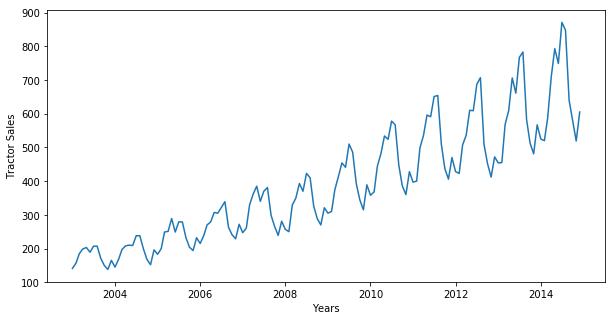

In [13]:
# Plot the time series
plt.figure(figsize=(10, 5))
plt.plot(sales_ts)
plt.xlabel('Years')
plt.ylabel('Tractor Sales')

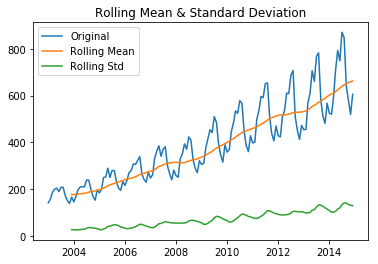

In [14]:
#Determing rolling statistics
rolmean = sales_ts.rolling(window=12).mean()
rolstd = sales_ts.rolling(window=12).std()

#Plot rolling statistics:
orig = plt.plot(sales_ts, label='Original')
mean = plt.plot(rolmean, label='Rolling Mean')
std = plt.plot(rolstd, label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [16]:
monthly_sales_data = pd.pivot_table(sales_data, values = "Tractor-Sales", columns = "Year", index = "Month")
monthly_sales_data = monthly_sales_data.reindex(index = ['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
monthly_sales_data

Year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Month,,,,,,,,,,,,
Jan,141,145,183,215,247,257,305,358,397,428,454,525
Feb,157,168,200,239,261,250,310,368,400,423,455,520
Mar,185,197,249,270,330,329,374,444,498,507,568,587
Apr,199,208,251,279,362,350,414,482,536,536,610,710
May,203,210,289,307,385,393,454,534,596,610,706,793
Jun,189,209,249,305,340,370,441,524,591,609,661,749
Jul,207,238,279,322,370,423,510,578,651,687,767,871
Aug,207,238,279,339,381,410,486,567,654,707,783,848
Sep,171,199,232,263,299,326,393,447,509,509,583,640


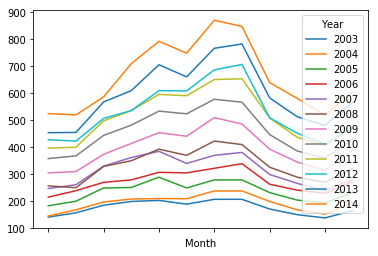

In [17]:
# This is to see month on month plot by year. This will help us to understand if we have
# similar patterns in the time series
monthly_sales_data.plot()

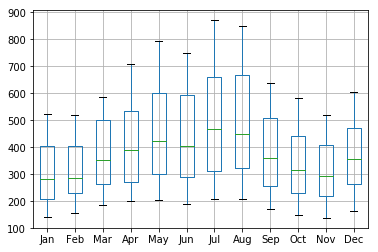

In [18]:
# Making yearly data and ploting it to check year patterns
yearly_sales_data = pd.pivot_table(sales_data, values = "Tractor-Sales", columns = "Month", index = "Year")
yearly_sales_data = yearly_sales_data[['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]
yearly_sales_data
yearly_sales_data.boxplot()

Important Inferences

The tractor sales have been increasing without fail every year.

July and August are the peak months for tractor sales and the variance and the mean value in July and August are also much higher than any of the other months.

We can see a seasonal cycle of 12 months where the mean value of each month starts with a increasing trend in the beginning of the year and drops down towards the end of the year.

We can see a seasonal effect with a cycle of 12 months.

In [19]:
decomposition = sm.tsa.seasonal_decompose(sales_ts, model='multiplicative')

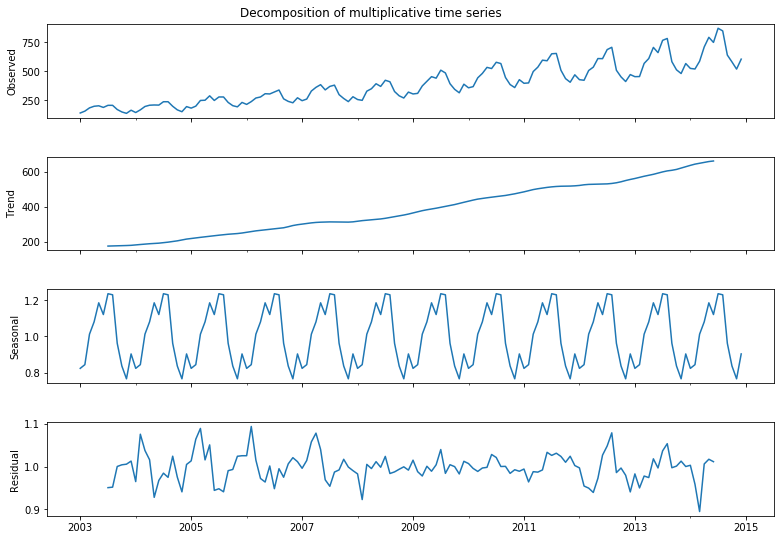

In [20]:
fig = decomposition.plot()
fig.set_figwidth(12)
fig.set_figheight(8)
fig.suptitle('Decomposition of multiplicative time series')
plt.show()

In [21]:
# Define the d and q parameters to take any value between 0 and 1
q = d = range(0, 2)
# Define the p parameters to take any value between 0 and 3
p = range(0, 4)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMA: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMA: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMA: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMA: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMA: (0, 0, 1) x (0, 0, 1, 12)
SARIMA: (0, 0, 1) x (0, 1, 0, 12)
SARIMA: (0, 1, 0) x (0, 1, 1, 12)
SARIMA: (0, 1, 0) x (1, 0, 0, 12)


In [22]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

AIC = []
SARIMAX_model = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(sales_ts,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic), end='\r')
            AIC.append(results.aic)
            SARIMAX_model.append([param, param_seasonal])
        except:
            continue

In [23]:
print('The smallest AIC is {} for model SARIMAX{}x{}'.format(min(AIC), SARIMAX_model[AIC.index(min(AIC))][0],SARIMAX_model[AIC.index(min(AIC))][1]))

The smallest AIC is 799.9064282670552 for model SARIMAX(3, 1, 0)x(3, 1, 1, 12)


In [24]:
# Let's fit this model
mod = sm.tsa.statespace.SARIMAX(sales_ts,
                                order=SARIMAX_model[AIC.index(min(AIC))][0],
                                seasonal_order=SARIMAX_model[AIC.index(min(AIC))][1],
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

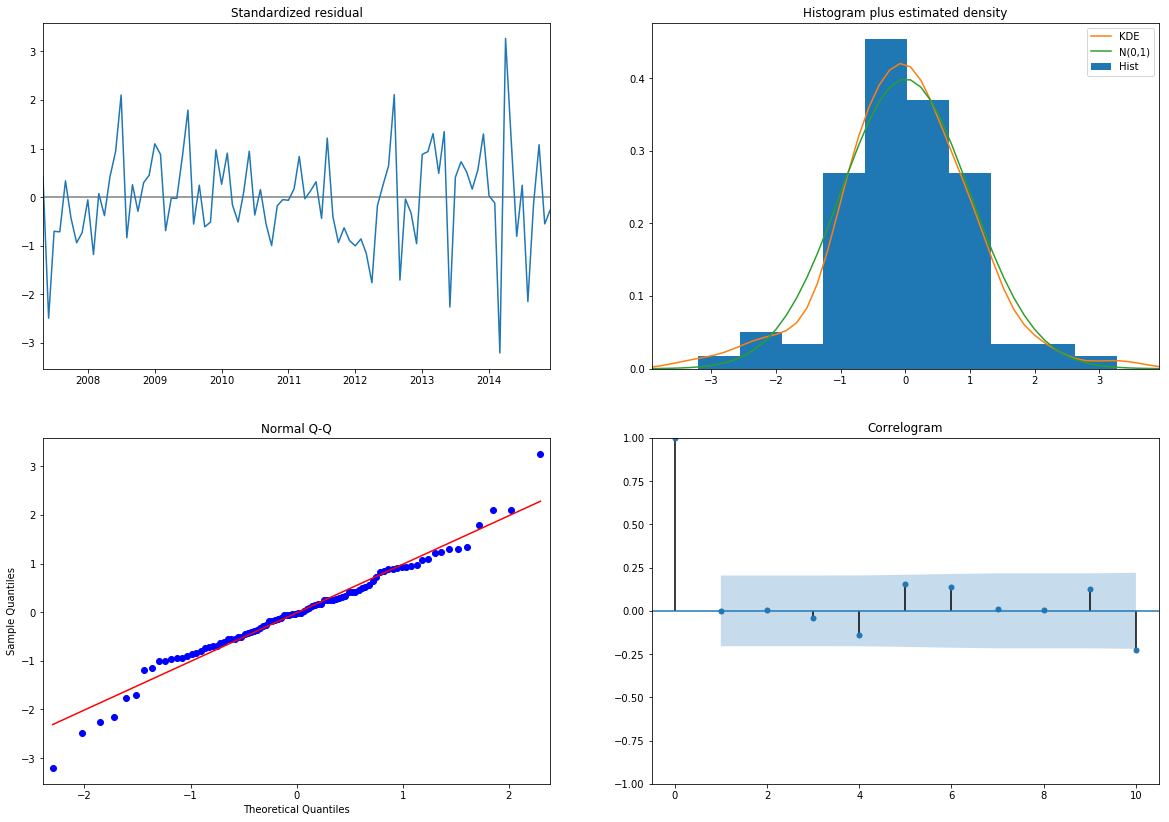

In [25]:
results.plot_diagnostics(figsize=(20, 14))
plt.show()

In [43]:
pred_test = results.get_prediction(start='2003-01-01', dynamic=True)
pred_test_ci = pred_test.conf_int()

In [39]:
pred_test2 = results.get_forecast('2016-01-01')
pred_test2_ci = pred_test2.conf_int()
pred_test2.

2015-01-01    567.745415
2015-02-01    556.943494
2015-03-01    653.673641
2015-04-01    744.866346
2015-05-01    844.332919
2015-06-01    807.892618
2015-07-01    932.876367
2015-08-01    932.345889
2015-09-01    691.806187
2015-10-01    622.015149
2015-11-01    566.535449
2015-12-01    655.746753
2016-01-01    617.342573
Freq: MS, dtype: float64

In [38]:
#In this case the model is used to predict data that the model was built on. 
#1-step ahead forecasting implies that each forecasted point is used to predict the 
#following one.
pred0 = results.get_prediction(start='2003-01-01', dynamic=False)
pred0_ci = pred0.conf_int()

#In sample prediction with dynamic forecasting of the last year  
#Again, the model is used to predict data that the model was built on.
pred1 = results.get_prediction(start='2003-01-01', dynamic=True)
pred1_ci = pred1.conf_int()

#"True" forecasting of out of sample data. 
#In this case the model is asked to predict data it has not seen before.
pred2 = results.get_forecast('2016-01-01')
# Give the end year till you want forecast
pred2_ci = pred2.conf_int()

In [53]:
pred2.summary_frame()

Tractor-Sales,mean,mean_se,mean_ci_lower,mean_ci_upper
2015-01-01,567.745415,15.934649,536.514077,598.976753
2015-02-01,556.943494,17.514105,522.616479,591.270509
2015-03-01,653.673641,19.569935,615.317273,692.030008
2015-04-01,744.866346,21.977396,701.791441,787.941251
2015-05-01,844.332919,23.687988,797.905315,890.760522
2015-06-01,807.892618,25.427528,758.055580,857.729657
2015-07-01,932.876367,27.069995,879.820152,985.932583
2015-08-01,932.345889,28.576770,876.336448,988.355330
2015-09-01,691.806187,30.028251,632.951896,750.660479
2015-10-01,622.015149,31.412416,560.447945,683.582353


In [50]:
pred2.t_test()

(array([35.62961543, 31.79971202, 33.40193223, 33.89238358, 35.64392692,
        31.77236197, 34.46163775, 32.62600634, 23.03851051, 19.80156979,
        17.30826306, 19.2873264 , 16.01980364]),
 array([4.87516179e-278, 6.53265511e-222, 1.28521359e-244, 8.62582689e-252,
        2.92629490e-278, 1.55961125e-221, 3.01442017e-260, 1.75477990e-233,
        1.91772348e-117, 2.88560087e-087, 4.07524192e-067, 6.86319444e-083,
        9.29433168e-058]))

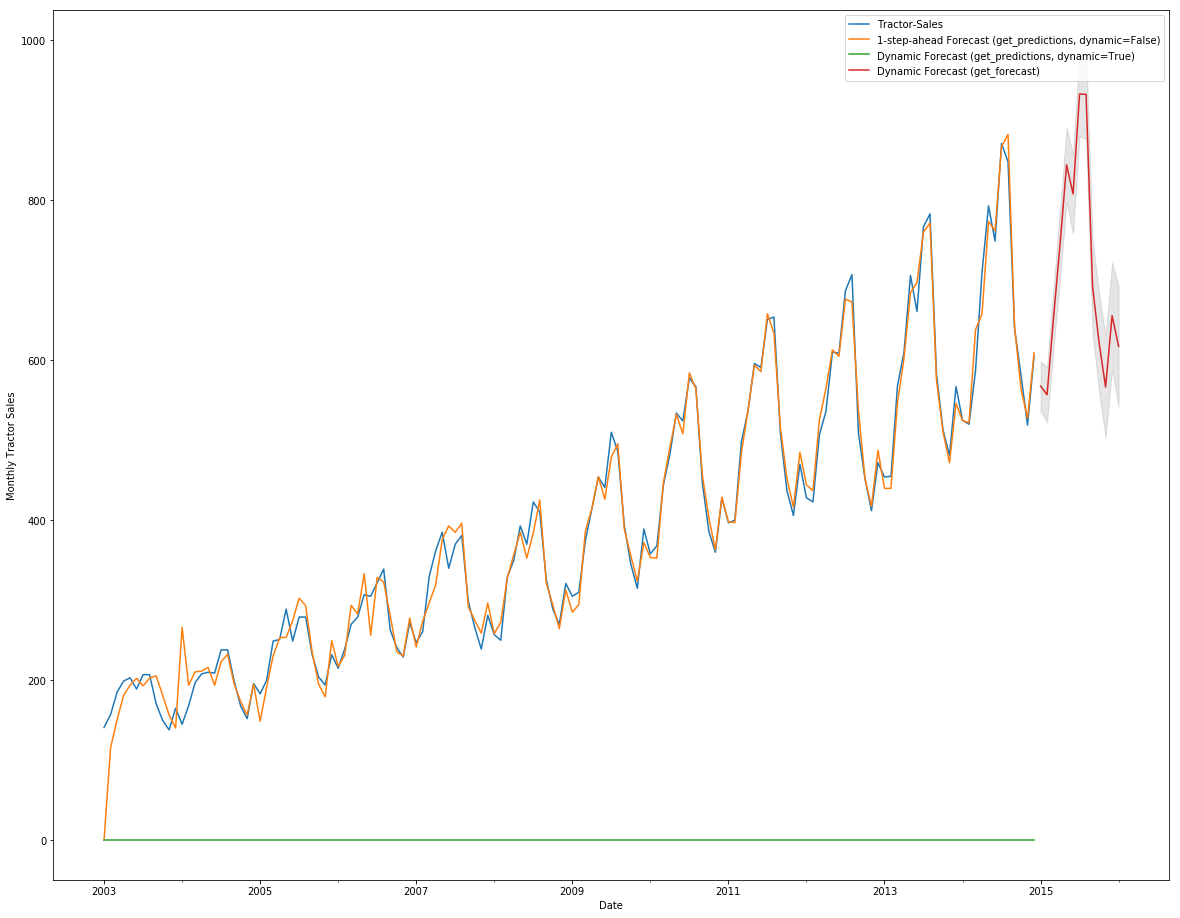

In [51]:
#Plot the predicted values
ax = sales_ts.plot(figsize=(20, 16))
pred0.predicted_mean.plot(ax=ax, label='1-step-ahead Forecast (get_predictions, dynamic=False)')
pred1.predicted_mean.plot(ax=ax, label='Dynamic Forecast (get_predictions, dynamic=True)')
pred2.predicted_mean.plot(ax=ax, label='Dynamic Forecast (get_forecast)')
ax.fill_between(pred2_ci.index, pred2_ci.iloc[:, 0], pred2_ci.iloc[:, 1], color='k', alpha=.1)
plt.ylabel('Monthly Tractor Sales')
plt.xlabel('Date')
plt.legend()
plt.show()